In [1]:
import sys
sys.path.append("../../")

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd


import tensorflow as tf
from tensorflow import keras
from scipy.signal import find_peaks

## Star model study

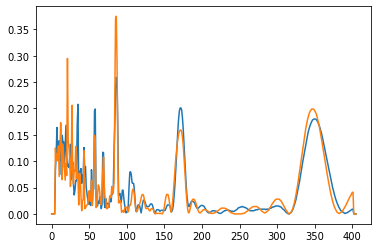

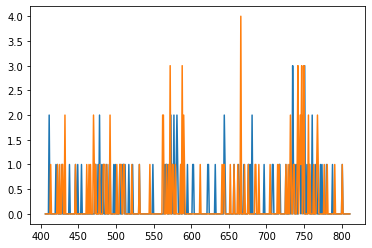

0    84.444444
1    84.444444
Name: 1218, dtype: float64


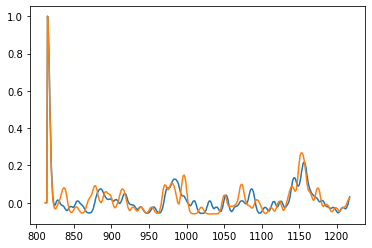

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/home/roberto/Downloads/evolutionTracks_line_noisy/VO-m140fe-3a164o0rotjpzt5p6-ad/00598-m140fe-3a164o0rotjpzt5p6-ad.log", header=None)

id = {"dft":range(0, 406), "hod":range(406, 406*2), "ac":range(406*2, 406*3)}


df.loc[0,id["dft"]].plot()
df.loc[1,id["dft"]].plot()
plt.show()

df.loc[0,id["hod"]].plot()
df.loc[1,id["hod"]].plot()
plt.show()

df.loc[0,id["ac"]].plot()
df.loc[1,id["ac"]].plot()

print(df.loc[0:3,1218] / 0.0864)

In [64]:
sepconv_mod = tf.keras.models.load_model("/tmp/sepconvnn_tmp_400")

Instructions for updating:
Please use `model.predict()` instead.
(array([26]),)
(array([74]),)
(array([38]),)


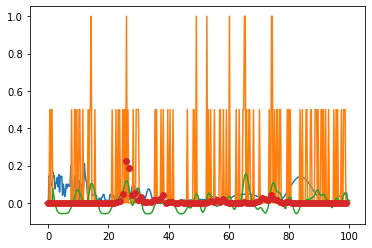

In [10]:
def normalize(x):
    """
    """
    return (x - np.min(x)) / (np.max(x) - np.min(x))


id_sample = 2

x = np.arange(-1, 100.5, 0.25)
aux = df.loc[id_sample, id["hod"]]
aux_hod = ((aux - aux.min()) / (aux.max() - aux.min()))
aux_ac = df.loc[id_sample, id["ac"]]
aux_ac[:10] = 0

star_model = np.stack([df.loc[id_sample, id["dft"]], aux_hod, aux_ac], axis=1)
plt.plot(x, star_model)
star_model = star_model.reshape(-1,406,3)
star_model = tf.data.Dataset.from_tensors(star_model)

plt.plot(np.arange(0, 100, 1), sepconv_mod.predict_proba(star_model)[0], "o")


probs = sepconv_mod.predict_proba(star_model)[0]
peaks, _ = find_peaks(probs, height=0, distance=10)
peaks_sorted_by_prob = np.sort(probs[peaks])[::-1]

print(np.where(probs == peaks_sorted_by_prob[0]))
print(np.where(probs == peaks_sorted_by_prob[1]))
print(np.where(probs == peaks_sorted_by_prob[2]))

In [180]:
inferences = []
inferences_probs = []

for i in range(200):
    id_sample = i

    x = np.arange(-1, 100.5, 0.25)
    aux = df.loc[id_sample, id["hod"]]
    aux_hod = ((aux - aux.min()) / (aux.max() - aux.min()))
    aux_ac = df.loc[id_sample, id["ac"]]
    aux_ac[:10] = 0

    star_model = np.stack([df.loc[id_sample, id["dft"]], aux_hod, aux_ac], axis=1)
    star_model = star_model.reshape(-1,406,3)
    star_model = tf.data.Dataset.from_tensors(star_model)

    probs = sepconv_mod.predict_proba(star_model)[0]
    peaks, _ = find_peaks(probs, height=0, distance=10)
    peaks_sorted_by_prob = np.sort(probs[peaks])[::-1]

    if peaks_sorted_by_prob[0] > 0.0:
        inferences.append(np.where(probs == peaks_sorted_by_prob[0])[0][0])
        inferences_probs.append(peaks_sorted_by_prob[0])
    if peaks_sorted_by_prob[1] > 0.0:
        inferences.append(np.where(probs == peaks_sorted_by_prob[1])[0][0])
        inferences_probs.append(peaks_sorted_by_prob[1])
    if peaks_sorted_by_prob[2] > 0.0:
        inferences.append(np.where(probs == peaks_sorted_by_prob[2])[0][0])
        inferences_probs.append(peaks_sorted_by_prob[2])

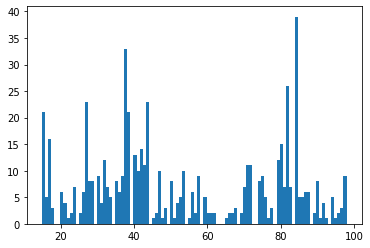

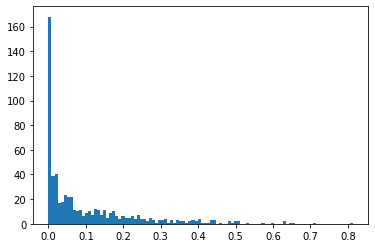

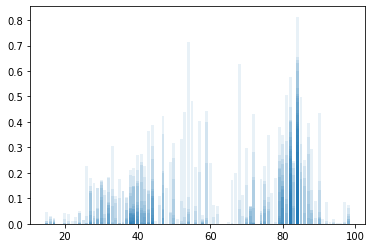

In [181]:
plt.hist(inferences, bins=100)
plt.show()
plt.hist(inferences_probs, bins=100)
plt.show()
plt.bar(inferences, inferences_probs, alpha=0.1)
plt.show()

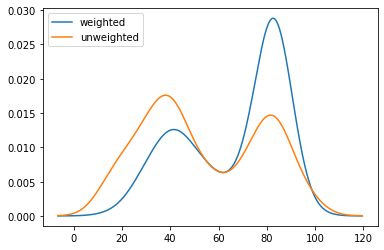

In [175]:
from statsmodels.nonparametric.kde import KDEUnivariate

df_counts = pd.DataFrame({'inferences': inferences,
                   'inferences_probs': inferences_probs})

kde1= KDEUnivariate(df_counts.inferences)
kde_noweight = KDEUnivariate(df_counts.inferences)
kde1.fit(weights=df_counts.inferences_probs, fft=False)
kde_noweight.fit()
plt.plot(kde1.support, kde1.density)
plt.plot(kde_noweight.support, kde_noweight.density)
plt.legend(['weighted', 'unweighted'])

## Bedding study

In [1]:
import sys
sys.path.append("../../")

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd


import tensorflow as tf
from tensorflow import keras
from scipy.signal import find_peaks

from astronn.preprocess import prebedding_noisy

[21.75 52.24 44.85 48.46 41.49  0.08 24.17 24.58  0.17 45.07 42.46 27.47
 34.76 30.86  0.26  0.29 37.57 18.86 22.98 31.2   1.93 28.91 38.21 37.95
 45.18  0.59 23.55 52.37  0.4  39.79]


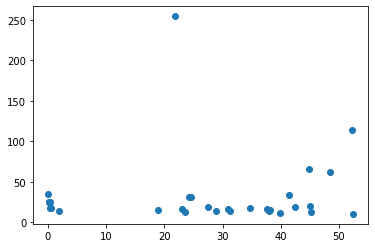

In [72]:
files = ["../../astronn/data/bedding/raw/tess2018349182459-s0006-0000000011361473-0126-s_lc_det.dat",
        "../../astronn/data/bedding/raw/tess2018349182459-s0006-0000000037498433-0126-s_lc_det.dat",
        "../../astronn/data/bedding/raw/tess2018234235059-s0002-0000000229139161-0121-s_lc_det.dat",
        "../../astronn/data/bedding/raw/tess2018319095959-s0005-0000000246902545-0125-s_lc_det.dat",
        "../../astronn/data/bedding/raw/tess2018349182459-s0006-0000000011361473-0126-s_lc_det.dat",
        
        "../../astronn/data/bedding/raw/tess2019032160000-s0008-0000000340358522-0136-s_lc_det.dat",
        "../../astronn/data/bedding/raw/tess2018292075959-s0004-0000000274038922-0124-s_lc_det.dat"]
df_freqs = pd.read_csv(files[6], 
                sep="\s+",
                header=None,
                index_col=False,
                names=["f", "signif", "a", "V4", "V5", "V6", "V7"])

df_freqs.sort_values('a', ascending=False)
print(np.round(df_freqs.head(30)["f"].to_list(), 2))
plt.scatter(df_freqs.head(30)["f"], df_freqs.head(30)["a"])

In [66]:
preprocessor = prebedding_noisy(
        conf_file="../../astronn/data/bedding/parameters.csv", cols=["tess", "dnu"]
    )
preprocessor.preprocess_files(
        input_folder="../../astronn/data/bedding/raw/tess2018292075959-s0004-0000000274038922-0124-s_lc_det.dat",
        output_folder="/tmp/",
    )

0
1
2
3
4
5
6
7
8
9


             f       signif           a        V4          V5         V6  \
0    21.745914  2133.247879  254.485340  2.233709  230.026457  54.414284   
1    52.243341  1092.010847  113.465638  1.481512  141.327098  48.418591   
2    44.850422   592.952821   65.623558  2.476358  116.655376  41.062156   
3    48.457799   590.313742   62.468292  1.864537  106.083470  38.790275   
4    41.488847   450.257697   33.840938  2.803827   96.513943  36.531402   
..         ...          ...         ...       ...         ...        ...   
207   4.641542     5.088868    2.050331  5.817801   35.058638  32.004452   
208   2.228918     5.057043    2.577597  1.593878   35.031397  32.004356   
209   2.595556     6.091250    2.528195  2.282462   35.000411  32.004367   
210  31.611805     5.030500    1.994839  5.661165   34.963223  32.004462   
211   0.000000     4.825862    0.000000  0.000000   34.936052  32.004282   

              V7  
0    2133.247879  
1    1092.010847  
2     592.952821  
3     590.3

Text(0, 0.5, 'a')

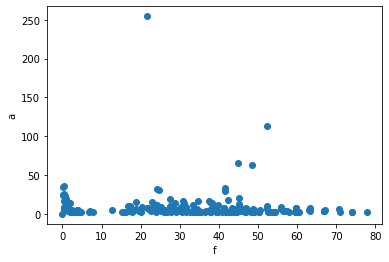

In [67]:
df_freqs = pd.read_csv("/tmp/freqs.csv")
print(df_freqs)
plt.scatter(df_freqs[["f"]], df_freqs[["a"]])
plt.xlabel("f")
plt.ylabel("a")

[21.75 52.24 44.85 48.46 41.49  0.08 24.17 24.58  0.17 45.07 42.46 27.47
 34.76 30.86  0.26  0.29 37.57 18.86 22.98 31.2   1.93 28.91 38.21 37.95
 45.18  0.59 23.55 52.37  0.4  39.79]


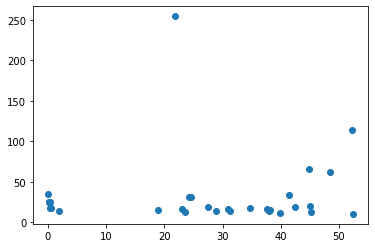

In [73]:
df_freqs.sort_values('a', ascending=False)
print(np.round(df_freqs.head(30)["f"].to_list(), 2))
plt.scatter(df_freqs.head(30)["f"], df_freqs.head(30)["a"])

0    83.333333
1    83.333333
2    83.333333
3    83.333333
Name: 1219, dtype: float64


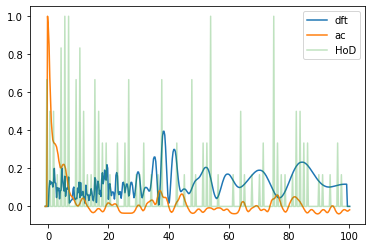

In [74]:
def normalize(x):
    """
    """
    return (x - np.min(x)) / (np.max(x) - np.min(x))


df = pd.read_csv("/tmp/tess2018292075959-s0004-0000000274038922-0124-s_lc_det.log", header=None)
id = {"dft":range(1, 407), "hod":range(407, (407*2)-1), "ac":range((407*2)-1, (407*3)-2)}

x = np.arange(-1, 100.5, 0.25)

plt.plot(x, df.loc[4,id["dft"]], label="dft")
#plt.show()
plt.plot(x, df.loc[4,id["ac"]], label="ac")

plt.plot(x, normalize(df.loc[3,id["hod"]]), alpha=0.3, label="HoD")
plt.legend()

print(df.loc[0:3,1219] / 0.0864)

In [75]:
sepconv_mod = tf.keras.models.load_model("/tmp/sepconvnn_tmp_400")

In [79]:
inferences = []
inferences_probs = []

for i in range(10):
    id_sample = i

    x = np.arange(-1, 100.5, 0.25)
    aux = df.loc[id_sample, id["hod"]]
    aux_hod = ((aux - aux.min()) / (aux.max() - aux.min()))
    aux_ac = df.loc[id_sample, id["ac"]]
    aux_ac[:10] = 0

    star_model = np.stack([df.loc[id_sample, id["dft"]], aux_hod, aux_ac], axis=1)
    star_model = star_model.reshape(-1,406,3)
    star_model = star_model.astype(np.float32)
    star_model = tf.data.Dataset.from_tensors(star_model)

    probs = sepconv_mod.predict_proba(star_model)[0]
    peaks, _ = find_peaks(probs, height=0, distance=10)
    peaks_sorted_by_prob = np.sort(probs[peaks])[::-1]

    if peaks_sorted_by_prob[0] > 0.0:
        inferences.append(np.where(probs == peaks_sorted_by_prob[0])[0][0])
        inferences_probs.append(peaks_sorted_by_prob[0])
    if peaks_sorted_by_prob[1] > 0.0:
        inferences.append(np.where(probs == peaks_sorted_by_prob[1])[0][0])
        inferences_probs.append(peaks_sorted_by_prob[1])
    if peaks_sorted_by_prob[2] > 0.0:
        inferences.append(np.where(probs == peaks_sorted_by_prob[2])[0][0])
        inferences_probs.append(peaks_sorted_by_prob[2])

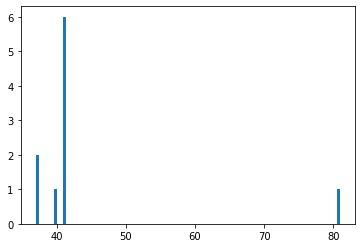

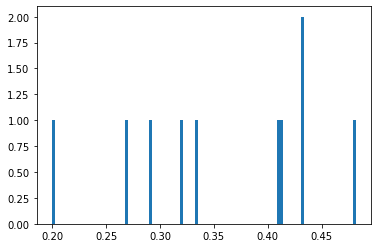

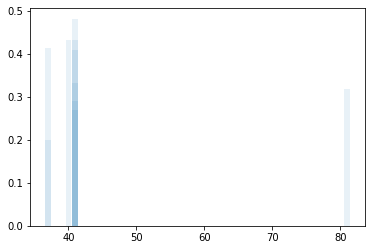

In [80]:
plt.hist(inferences, bins=100)
plt.show()
plt.hist(inferences_probs, bins=100)
plt.show()
plt.bar(inferences, inferences_probs, alpha=0.1)
plt.show()

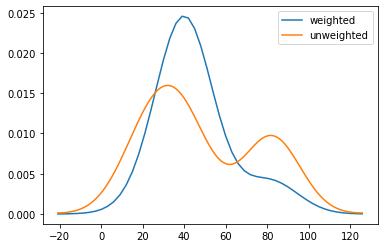

In [78]:
from statsmodels.nonparametric.kde import KDEUnivariate

df_counts = pd.DataFrame({'inferences': inferences,
                   'inferences_probs': inferences_probs})

kde1= KDEUnivariate(df_counts.inferences)
kde_noweight = KDEUnivariate(df_counts.inferences)
kde1.fit(weights=df_counts.inferences_probs, fft=False)
kde_noweight.fit()
plt.plot(kde1.support, kde1.density)
plt.plot(kde_noweight.support, kde_noweight.density)
plt.legend(['weighted', 'unweighted'])